In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, select, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo = False)

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
inspector

In [6]:
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# reflect an existing database into a new model
    # creates set of clases for each table in hawaii.sqlite
Base = automap_base()

# reflect the tables (defines classes that represent data in the table)
Base.prepare(engine, reflect=True)


In [10]:
# View all of the classes that automap found
for cls in Base.classes:
    print(cls)


<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [11]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)
session


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
latest_date = dt.date.fromisoformat(session.query(func.max(Measurement.date)).first()[0])
latest_date

datetime.date(2017, 8, 23)

Text(0, 0.5, 'Precipitation (inches)')

<Figure size 3600x3600 with 0 Axes>

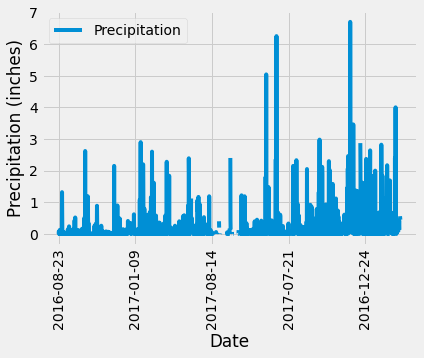

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
    
# Calculate the date one year from the last date in data set.
earliest_date = latest_date.replace(year = latest_date.year -1)
earliest_date

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= earliest_date.isoformat()).all()
prcp_data


# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df = pd.DataFrame(prcp_data)
prcp_df.rename(columns = {'date': 'Date', 'prcp': 'Precipitation'}, inplace = True)
prcp_df.sort_values(by='Date')
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(50, 50))
prcp_df.plot(x="Date", y="Precipitation", rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")



In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()